In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import nltk
#nltk.download()

# Text mining
Broad term to refer to techniques used to automatically extract information from natural text (written by humans for humans).

In [3]:
# Load president speeches.
from nltk.corpus import inaugural

## A *word* on tokens
A token is a unit in text processing.
- In general, we divide text into words, and each word becomes a token.
- In other models, tokens can be single characters, or n-grams.

The sentence **"the dog chased the cat"** contains:
- 5 words ("the", "dog", "chased", "the", "cat")
- 22 characters ("t", "h", "e", " ", "d", "o", "g", " ", "c", "h", "a", "s", "e", "d", " ", "t", "h", "e", " " , "c", "a", "t")
- 18 4-grams ("the ", "he d", "e do", " dog", "dog ", "og c", ...)

Depending on the model, things like spaces, punctuation marks, common words like "the" or "of", etc. can be excluded.

Also, **words** can be stemmed: "program", "programming", "programmer", etc. all become "program" (their *stem* word).

## Sentiment analysis
One of the most basic and common (and probably useful) text mining/NLP tasks. Widely used in product reviews.

It is a **supervised classification** task where human evaluators mark pieces of text (words, sentences, paragraphs, documents) as having a **positive or negative** sentiment to create a train set. Then different methods can be used to map the features (text occurrences) to their sentiment labels. The learned model can then be used to make preditions.

In [4]:
pos = pd.read_csv('http://ptrckprry.com/course/ssd/data/positive-words.txt', header=None, comment=';', encoding='latin_1')[0]
neg = pd.read_csv('http://ptrckprry.com/course/ssd/data/negative-words.txt', header=None, comment=';', encoding='latin_1')[0]

In [5]:
print(pos.head())
print(neg.head())

0           a+
1       abound
2      abounds
3    abundance
4     abundant
Name: 0, dtype: object
0       2-faced
1       2-faces
2      abnormal
3       abolish
4    abominable
Name: 0, dtype: object


In [6]:
speeches = pd.DataFrame(np.zeros((len(inaugural.fileids()), 3)), dtype='int')
speeches.index = inaugural.fileids()
speeches.columns = ['positive', 'negative', 'count']
speeches.head()

,positive,negative,count
1789-Washington.txt,0,0,0
1793-Washington.txt,0,0,0
1797-Adams.txt,0,0,0
1801-Jefferson.txt,0,0,0
1805-Jefferson.txt,0,0,0


In [7]:
for fileid in inaugural.fileids():    
    # Count pos/neg words per speech.
    for word in inaugural.words(fileid):
        speeches.loc[fileid, 'count'] += 1
        
        word = word.lower()
        if word in pos.values:
            speeches.loc[fileid, 'positive'] += 1
        elif word in neg.values:
            speeches.loc[fileid, 'negative'] += 1
            
speeches.head()

,positive,negative,count
1789-Washington.txt,88,34,1538
1793-Washington.txt,6,1,147
1797-Adams.txt,148,48,2585
1801-Jefferson.txt,131,51,1935
1805-Jefferson.txt,105,62,2384


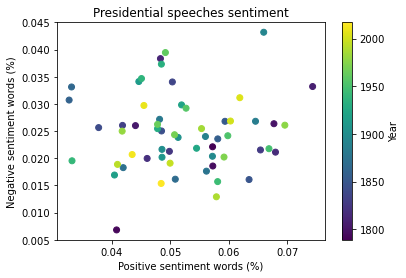

0.03133339754145203

In [8]:
years = [int(x.split('-')[0]) for x in speeches.index]

plt.scatter(speeches['positive'] / speeches['count'], speeches['negative'] / speeches['count'], c=years)

plt.title('Presidential speeches sentiment')
plt.xlabel('Positive sentiment words (%)')
plt.ylabel('Negative sentiment words (%)')
plt.colorbar().ax.set_ylabel('Year')

plt.show()

(speeches['positive'] / speeches['count']).corr(speeches['negative'] / speeches['count'])

In [9]:
# NRC emotion lexicon (manually stripped header).
nrc = pd.read_table('C:/Users/PC/Downloads/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt', header=None)
nrc = nrc.pivot(index=0, columns=1, values=2)
nrc.index.name = nrc.columns.name = None
nrc

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
NaN,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,1
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
zone,0,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0
zoological,0,0,0,0,0,0,0,0,0,0
zoology,0,0,0,0,0,0,0,0,0,0


In [10]:
speeches = pd.DataFrame(np.zeros((len(inaugural.fileids()), 11)), dtype='int')
speeches.index = inaugural.fileids()
speeches.columns = np.concatenate((nrc.columns.values, ['count']))
speeches.head()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,count
1789-Washington.txt,0,0,0,0,0,0,0,0,0,0,0
1793-Washington.txt,0,0,0,0,0,0,0,0,0,0,0
1797-Adams.txt,0,0,0,0,0,0,0,0,0,0,0
1801-Jefferson.txt,0,0,0,0,0,0,0,0,0,0,0
1805-Jefferson.txt,0,0,0,0,0,0,0,0,0,0,0


In [11]:
for fileid in inaugural.fileids():    
    # Count emotion words per speech.
    for word in inaugural.words(fileid):
        speeches.loc[fileid, 'count'] += 1
        
        word = word.lower()
        if word not in nrc.index.values:
            continue
        elif not (nrc.loc[word] == 1).any():
            continue
            
        speeches.loc[fileid, np.concatenate((nrc.loc[word] == 1, [False]))] += 1

speeches.head()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,count
1789-Washington.txt,9,49,6,25,46,42,121,13,19,76,1538
1793-Washington.txt,2,3,1,4,5,4,17,1,2,12,147
1797-Adams.txt,29,82,21,52,90,86,252,23,30,177,2585
1801-Jefferson.txt,31,56,14,56,70,66,166,27,30,108,1935
1805-Jefferson.txt,24,79,18,42,70,71,202,21,31,138,2384


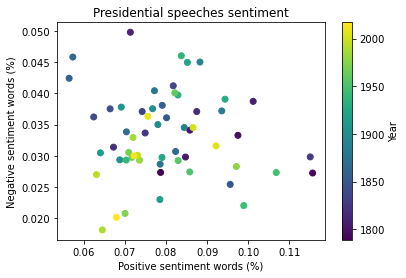

-0.08059916418249577

In [12]:
years = [int(x.split('-')[0]) for x in speeches.index]

plt.scatter(speeches['positive'] / speeches['count'], speeches['negative'] / speeches['count'], c=years)

plt.title('Presidential speeches sentiment')
plt.xlabel('Positive sentiment words (%)')
plt.ylabel('Negative sentiment words (%)')
plt.colorbar().ax.set_ylabel('Year')

plt.show()

(speeches['positive'] / speeches['count']).corr(speeches['negative'] / speeches['count'])

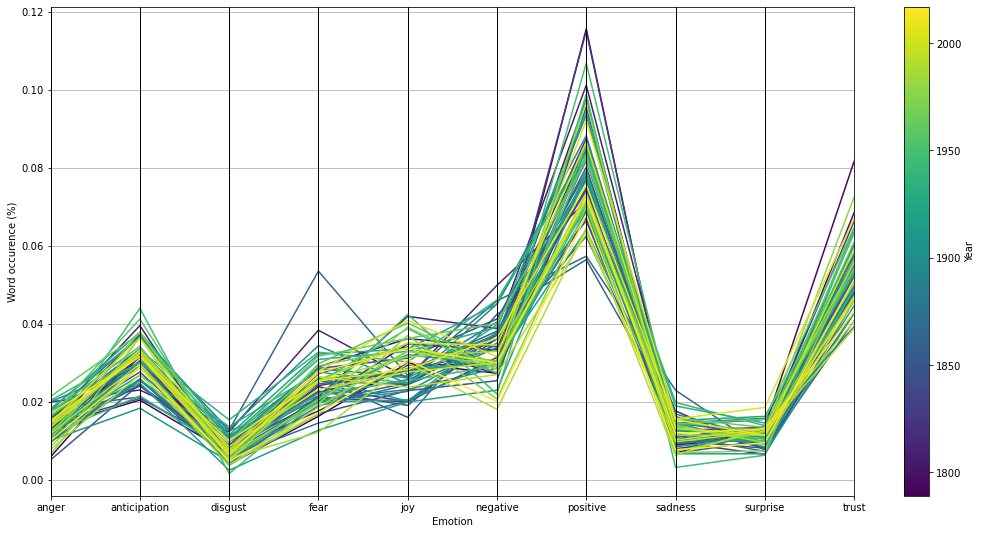

In [13]:
from pandas.plotting import parallel_coordinates
import matplotlib.cm as cm
from matplotlib.colors import Normalize

s = speeches.drop(columns='count').apply(lambda x: x / speeches['count'])
s['year'] = [int(x.split('-')[0]) for x in speeches.index]

fig, ax = plt.subplots(figsize=(18, 9))
parallel_coordinates(s, 'year', colormap='viridis')

plt.xlabel('Emotion')
plt.ylabel('Word occurence (%)')
ax.legend_.remove()
norm = Normalize(s['year'].min(), s['year'].max())
plt.colorbar(cm.ScalarMappable(norm, 'viridis')).ax.set_ylabel('Year')

plt.show()

### Feature extraction: converting natural text into features suitable for numerical analysis.

In [14]:
# Regression example.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(s.drop(columns='year'))
#x = s.drop(columns='year') * 100
y = s['year']

model = LinearRegression()
model.fit(x, y)

print(model.score(x, y))
print(model.intercept_)
pd.DataFrame([s.columns[:-1], model.coef_])

0.5195493952947922
1903.0


,0,1,2,3,4,5,6,7,8,9
0,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
1,24.7747,9.9661,23.507,-7.10603,24.678,-55.5336,-23.1427,4.93922,4.49271,-13.4622


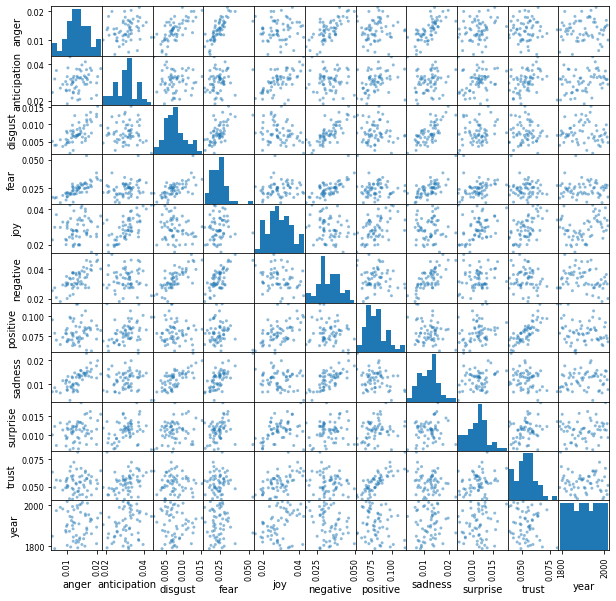

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(s, figsize=(10, 10))

plt.show()

In [16]:
from sklearn.linear_model import Lasso

model = Lasso(10)
model.fit(x, y)

print(model.score(x, y))
print(model.intercept_)
pd.DataFrame([s.columns[:-1], model.coef_])

0.2425208095830269
1903.0


,0,1,2,3,4,5,6,7,8,9
0,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
1,0,3.75252,0,0,12.3182,-10.1987,-11.8593,0,0,-0


## Word clouds
Quite useless for the data scientist, but stakeholders may love them!

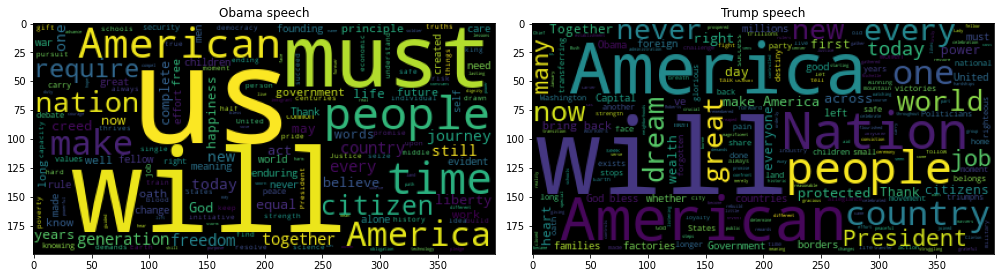

In [17]:
from wordcloud import WordCloud
from PIL import Image

obama = WordCloud().generate(' '.join(inaugural.words('2013-Obama.txt')))
trump = WordCloud().generate(' '.join(inaugural.words('2017-Trump.txt')))

#obama_mask = np.array(Image.open('C:/Users/PC/Downloads/wc/obama.jpg'))
#trump_mask = np.array(Image.open('C:/Users/PC/Downloads/wc/trump.jpg'))
#obama = WordCloud(mask=obama_mask).generate(' '.join(inaugural.words('2013-Obama.txt')))
#trump = WordCloud(mask=trump_mask).generate(' '.join(inaugural.words('2017-Trump.txt')))

fig, ax = plt.subplots(1, 2, figsize=(14, 10))
ax[0].imshow(obama)
ax[1].imshow(trump)

ax[0].set_title('Obama speech')
ax[1].set_title('Trump speech')

plt.tight_layout()
plt.show()

## Complexity analysis

In [18]:
new_speeches = speeches.copy()

del new_speeches['count']
new_speeches['n_words'] = 0
new_speeches['n_sentences'] = 0
new_speeches['cum_word_len'] = 0

for fileid in inaugural.fileids():    
    # Compute complexity per speech.
    
    # Sentence lenght.
    new_speeches.loc[fileid, 'n_sentences'] = len(inaugural.sents(fileid))
    
    # Word length.
    for word in inaugural.words(fileid):
        new_speeches.loc[fileid, 'n_words'] += 1                
        new_speeches.loc[fileid, 'cum_word_len'] += len(word)

new_speeches.head()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,n_words,n_sentences,cum_word_len
1789-Washington.txt,9,49,6,25,46,42,121,13,19,76,1538,24,7181
1793-Washington.txt,2,3,1,4,5,4,17,1,2,12,147,4,652
1797-Adams.txt,29,82,21,52,90,86,252,23,30,177,2585,37,11545
1801-Jefferson.txt,31,56,14,56,70,66,166,27,30,108,1935,42,8398
1805-Jefferson.txt,24,79,18,42,70,71,202,21,31,138,2384,45,10727


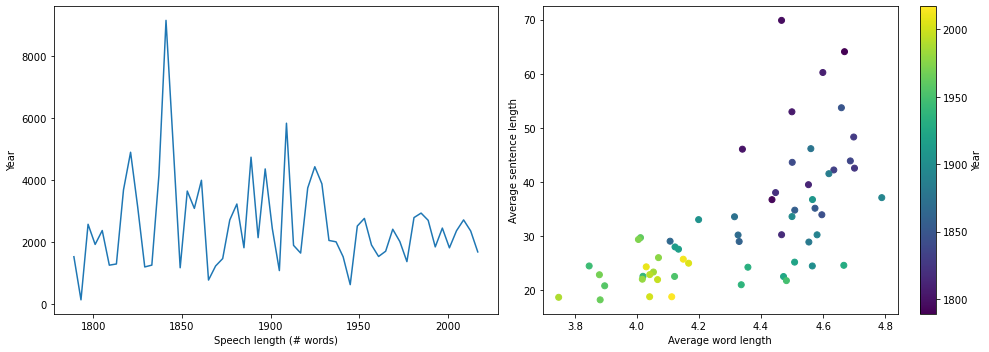

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(s['year'], new_speeches['n_words'])
ax[1].scatter(new_speeches['cum_word_len'] / new_speeches['n_words'],
            new_speeches['n_words'] / new_speeches['n_sentences'],
            c=s['year'])

ax[0].set_xlabel('Speech length (# words)')
ax[0].set_ylabel('Year')
ax[1].set_xlabel('Average word length')
ax[1].set_ylabel('Average sentence length')
plt.colorbar(cm.ScalarMappable(norm, 'viridis')).ax.set_ylabel('Year')

plt.tight_layout()
plt.show()